<a href="https://colab.research.google.com/github/YY2mk/KT_aivle/blob/master/DeepLearning/DX_%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EA%B8%B0%EC%B4%88_2%EC%9D%BC%EC%B0%A8%20%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/06%EA%B3%BC_3_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [19]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [20]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data() # 튜플 형태로 반환

In [21]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [22]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

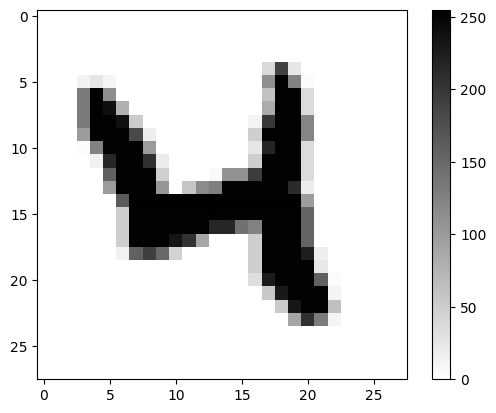

In [23]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 20

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [24]:
# 옵션추가해주세요.
np.set_printoptions(linewidth= np.inf)
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 240,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 252, 238,  52,   0,   0,   0,   0,   0,   0,   0,   0,  12, 198, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99, 252, 252, 252, 181,  17,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3, 125, 252, 252, 252, 100,   0,   0,   0,   0,   0,   0,   0,  26, 218, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  15, 216, 252, 252, 207,  19,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 157, 252, 252, 252,  48,   0,   0,   0,   6, 109, 109, 194, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100, 252, 252, 252, 105,   0,  58, 116, 128, 252, 252, 252, 252, 252, 212,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 253, 253, 253, 253, 253, 253, 255, 253, 253, 253, 253, 253, 253,  99,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 217, 216, 141, 126, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 234, 204,  89,   0,   0,   0,  49, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 158, 192, 151,  45,   0,   0,   0,   0,   0,  49, 252, 252, 252, 225,  17,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252,  23,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 228, 252, 252, 252, 157,   4,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 229, 252, 252, 252,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 232, 252, 252,  63,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 206, 131,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

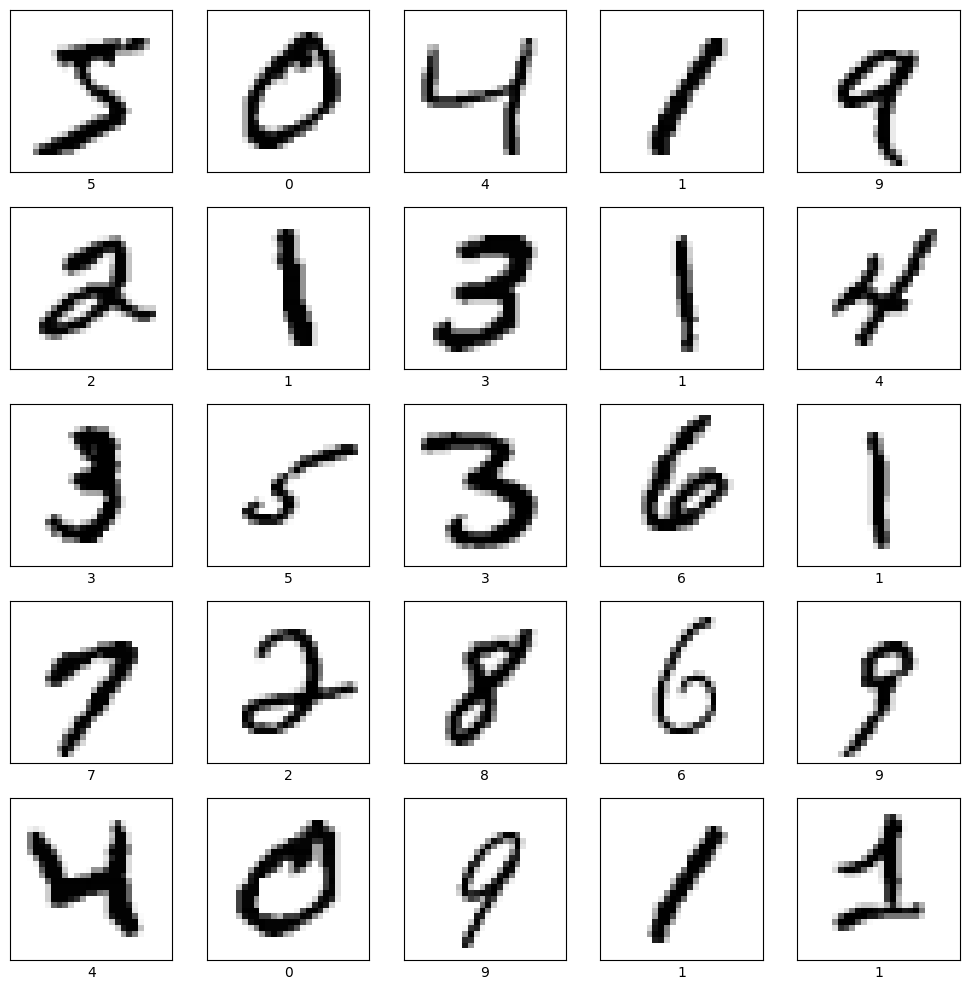

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [26]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [28]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))

[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [29]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [30]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_val를 그냥 255로 나누면 됨

In [31]:
x_train = x_train / 255
x_val = x_val / 255

## 4.모델링

In [32]:
nfeatures = x_train.shape[1]
nfeatures

784

In [33]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5116 - val_loss: 0.3171
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3174 - val_loss: 0.2876
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2935 - val_loss: 0.2749
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2809 - val_loss: 0.2737
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2738 - val_loss: 0.2652
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2677 - val_loss: 0.2647
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2637 - val_loss: 0.2670
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2605 - val_loss: 0.2596
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2575 - val_loss: 0.2623
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.255

* 학습결과 그래프

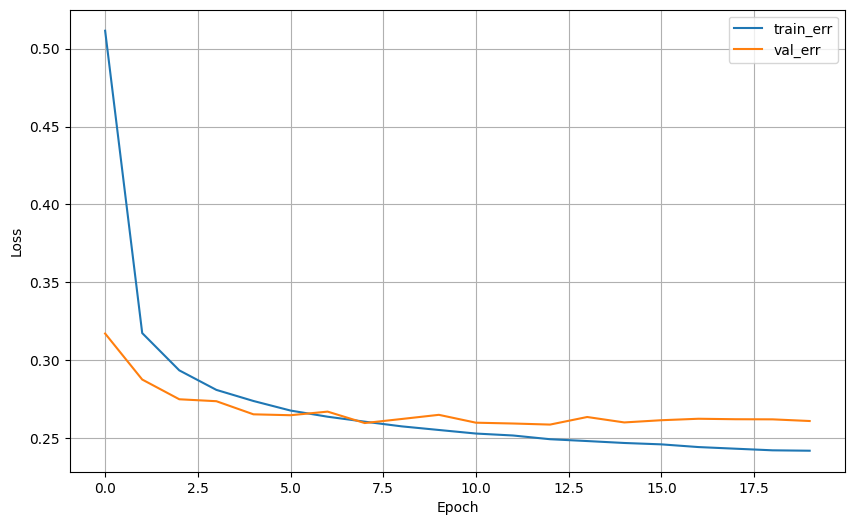

In [35]:
dl_history_plot(history)

* 예측 및 평가

In [36]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 1s 1ms/step


In [37]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 965    0    0    2    1    5    4    2    1    0]
 [   0 1110    3    2    0    1    3    2   14    0]
 [   7   10  919   16    8    4   12   11   42    3]
 [   4    0   15  919    2   24    2   11   26    7]
 [   1    1    7    2  928    0    6    6   10   21]
 [   9    2    5   29    9  787   11    9   27    4]
 [  14    3    9    1    8   16  904    1    2    0]
 [   2    7   18    7    7    0    0  959    3   25]
 [  10    6    6   20    9   22    5   12  877    7]
 [  11    7    1   10   34    5    0   35    8  898]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.95      0.94      0.95       958
           7       0.92      0.93   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [39]:
n = x_train.shape[1]
n

784

In [80]:
clear_session()
model = Sequential([Dense(64, input_shape=(n, ), activation='relu'),
                     Dense(32, activation='relu'),
                    Dense(16, activation='relu'),
                     Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model.fit(x_train, y_train, epochs=20, validation_split=.2).history

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3081 - val_loss: 0.1913
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1914 - val_loss: 0.1820
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1690 - val_loss: 0.1608
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1472 - val_loss: 0.1676
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1429 - val_loss: 0.1813
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1319 - val_loss: 0.1513
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1171 - val_loss: 0.1527
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1214 - val_loss: 0.1690
Epoch 9/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1129 - val_loss: 0.1995
Epoch 10/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.106

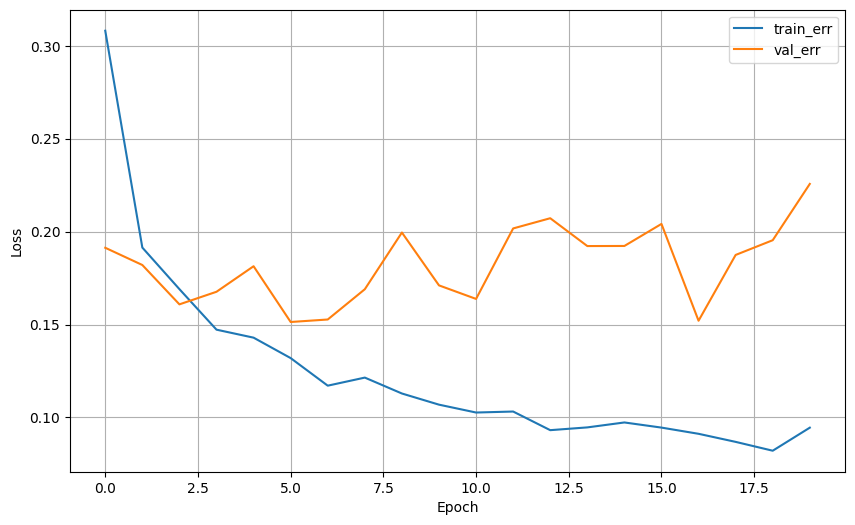

In [82]:
dl_history_plot(hist)

In [83]:
pred = model.predict(x_val)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [84]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 965    0    0    2    1    5    4    2    1    0]
 [   0 1110    3    2    0    1    3    2   14    0]
 [   7   10  919   16    8    4   12   11   42    3]
 [   4    0   15  919    2   24    2   11   26    7]
 [   1    1    7    2  928    0    6    6   10   21]
 [   9    2    5   29    9  787   11    9   27    4]
 [  14    3    9    1    8   16  904    1    2    0]
 [   2    7   18    7    7    0    0  959    3   25]
 [  10    6    6   20    9   22    5   12  877    7]
 [  11    7    1   10   34    5    0   35    8  898]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.95      0.94      0.95       958
           7       0.92      0.93   

### (2) 모델2

In [49]:
n

784

In [75]:
clear_session()
model = Sequential([Dense(32, input_shape=(n, ), activation='relu'),
                     Dense(16, activation='relu'),
                     Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 25818 (100.85 KB)
Trainable params: 25818 (100.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(optimizer=Adam(0.01), loss='sparse_categorical_crossentropy')
hist = model.fit(x_train, y_train, epochs=10, validation_split=.2, verbose = 0).history

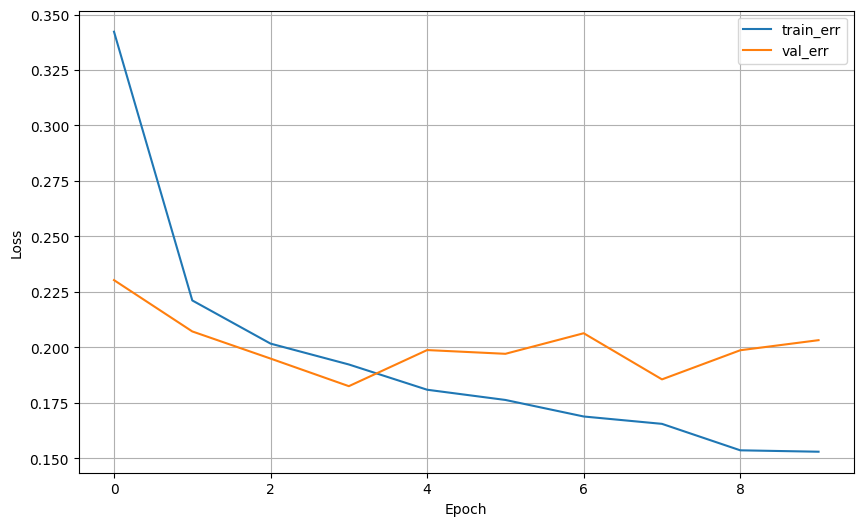

In [77]:
dl_history_plot(hist)

In [78]:
pred = model.predict(x_val)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 1s 4ms/step


In [79]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 965    0    0    2    1    5    4    2    1    0]
 [   0 1110    3    2    0    1    3    2   14    0]
 [   7   10  919   16    8    4   12   11   42    3]
 [   4    0   15  919    2   24    2   11   26    7]
 [   1    1    7    2  928    0    6    6   10   21]
 [   9    2    5   29    9  787   11    9   27    4]
 [  14    3    9    1    8   16  904    1    2    0]
 [   2    7   18    7    7    0    0  959    3   25]
 [  10    6    6   20    9   22    5   12  877    7]
 [  11    7    1   10   34    5    0   35    8  898]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.95      0.94      0.95       958
           7       0.92      0.93   